
Treinando com relu...

Treinando com tanh...

Treinando com tanh...

Treinando com logistic...

Treinando com logistic...


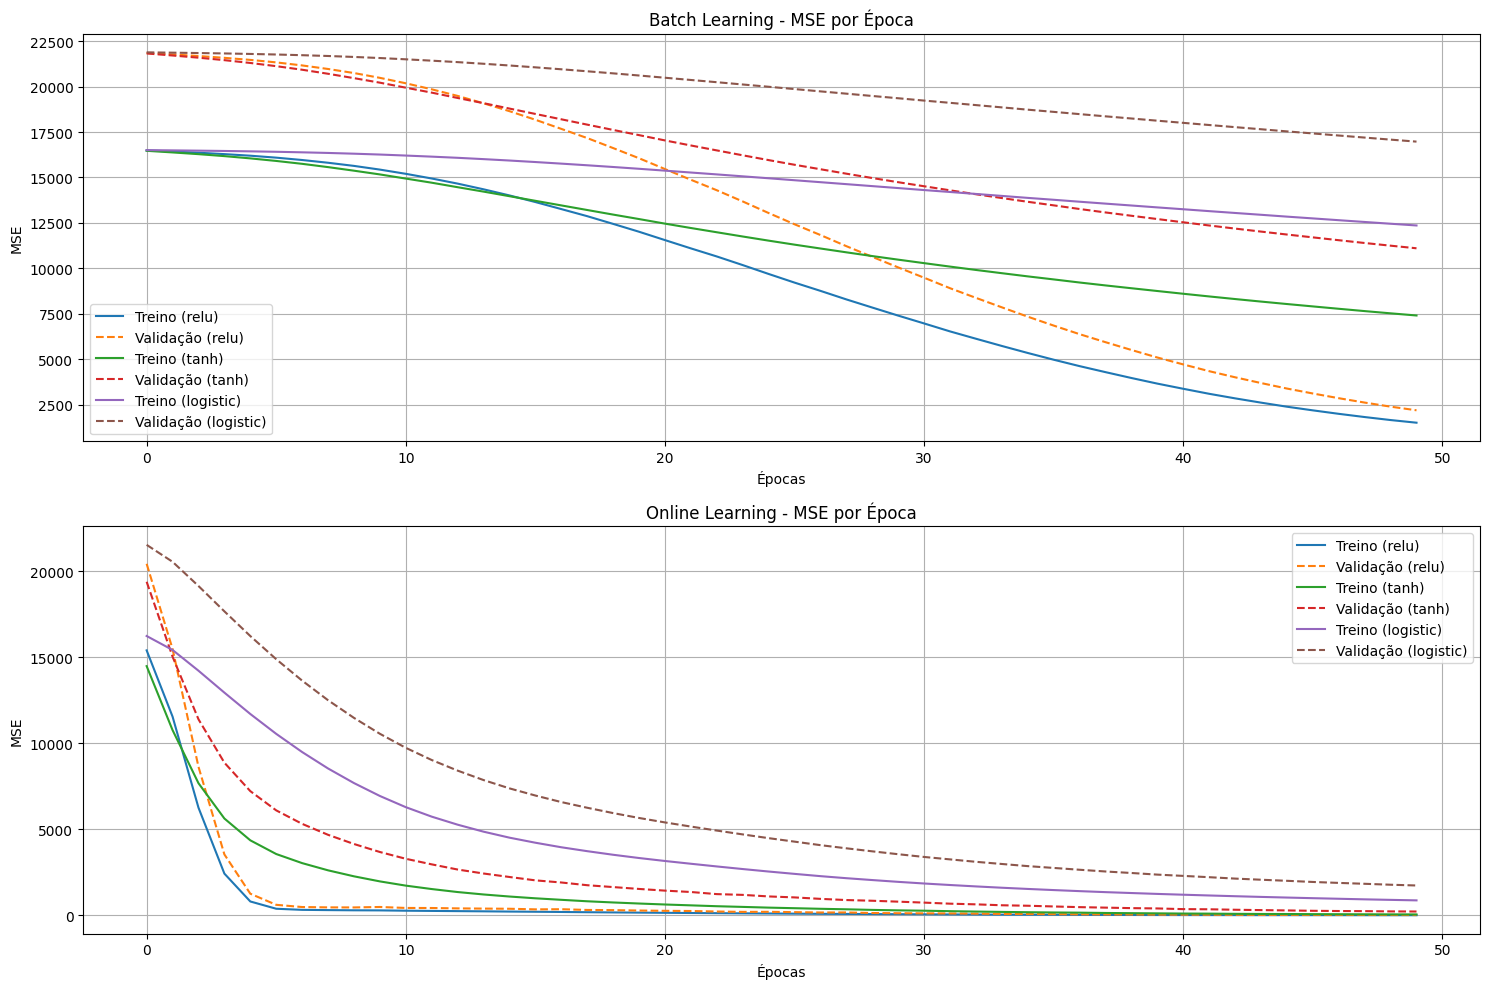

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## 1. Gerar dados de exemplo
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 2. Definir funções de treinamento

def batch_learning(X_train, y_train, X_val, y_val, activation, n_epochs=50, batch_size=32):
    """Implementação de Batch Learning"""
    model = MLPRegressor(
        hidden_layer_sizes=(50,),
        activation=activation,
        solver='adam',
        max_iter=1,
        warm_start=True,
        random_state=42
    )
    
    train_errors = []
    val_errors = []
    
    for epoch in range(n_epochs):
        # Embaralhar os dados
        idx = np.random.permutation(len(X_train))
        X_shuffled = X_train[idx]
        y_shuffled = y_train[idx]
        
        # Treinar em batches
        for i in range(0, len(X_train), batch_size):
            model.partial_fit(
                X_shuffled[i:i+batch_size], 
                y_shuffled[i:i+batch_size]
            )
        
        # Calcular erros
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        train_errors.append(np.mean((train_pred - y_train)**2))
        val_errors.append(np.mean((val_pred - y_val)**2))
        
    return train_errors, val_errors

def online_learning(X_train, y_train, X_val, y_val, activation, n_epochs=50):
    """Implementação de Online Learning (um exemplo por vez)"""
    model = MLPRegressor(
        hidden_layer_sizes=(50,),
        activation=activation,
        solver='adam',
        max_iter=1,
        warm_start=True,
        random_state=42
    )
    
    train_errors = []
    val_errors = []
    
    for epoch in range(n_epochs):
        # Embaralhar os dados
        idx = np.random.permutation(len(X_train))
        X_shuffled = X_train[idx]
        y_shuffled = y_train[idx]
        
        # Treinar um exemplo por vez
        for i in range(len(X_train)):
            model.partial_fit(
                X_shuffled[i:i+1], 
                y_shuffled[i:i+1]
            )
        
        # Calcular erros
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        train_errors.append(np.mean((train_pred - y_train)**2))
        val_errors.append(np.mean((val_pred - y_val)**2))
        
    return train_errors, val_errors

## 3. Executar experimentos
activations = ['relu', 'tanh', 'logistic']
results = {}

for activation in activations:
    print(f"\nTreinando com {activation}...")
    
    # Batch Learning
    train_err, val_err = batch_learning(X_train, y_train, X_val, y_val, activation)
    results[f'batch_{activation}'] = (train_err, val_err)
    
    # Online Learning
    train_err, val_err = online_learning(X_train, y_train, X_val, y_val, activation)
    results[f'online_{activation}'] = (train_err, val_err)

## 4. Visualizar resultados
plt.figure(figsize=(15, 10))

# Plot para Batch Learning
plt.subplot(2, 1, 1)
for activation in activations:
    plt.plot(results[f'batch_{activation}'][0], label=f'Treino ({activation})')
    plt.plot(results[f'batch_{activation}'][1], '--', label=f'Validação ({activation})')
plt.title('Batch Learning - MSE por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Plot para Online Learning
plt.subplot(2, 1, 2)
for activation in activations:
    plt.plot(results[f'online_{activation}'][0], label=f'Treino ({activation})')
    plt.plot(results[f'online_{activation}'][1], '--', label=f'Validação ({activation})')
plt.title('Online Learning - MSE por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1. Qual função de ativação apresentou melhor desempenho de generalização (menor erro no conjunto de teste) em cada modo de aprendizado? Explique por que isso pode ter acontecido com base nas características das funções.

2.Comparando batch learning e online learning, qual dos dois modos teve convergência mais estável e eficiente? Em quais cenários práticos cada modo seria mais adequado?

3.Se os dados fossem recebidos continuamente em tempo real (como em sensores IoT), qual modo de aprendizado você recomendaria? Você faria alguma modificação na arquitetura ou no processo de treino? Justifique.